In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.columns = ['Class Label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color Intensity',
                'Hue', 'OD280/OD315', 'Proline']
wine.head()

,Class Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
print('Class lables', np.unique(wine['Class Label']))

Class lables [1 2 3]


In [5]:
from sklearn.model_selection import train_test_split

X, y = wine.iloc[:, 1:].values, wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0, stratify=y)

In [6]:
# scaling: normalization and standardization
# Xnormal = (X - min)/(max - min)

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

# standardization means N(0,1)
# (x - mean of feature column)/ feature column standard deviation

In [7]:
ex = np.array([0,1,2,3,4,5])
print('standardized:', (ex - ex.mean())/ex.std())
print('normalized:', (ex - ex.min())/(ex.max()-ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [8]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

# control overfitting(high variance)

- more training data
- penalty for complexity via regularization
- simple model via feature selection
- reduce dimensionality


## L1 and L2 regularization
L1 is to use absolute value to penalize large individual weights
L2 is to use square to penalize large weights

Because L1 usually yields sparse field vectors (most features are zero), it is useful if we have a high-dimentional dataset, especially in cases where we have more irrelevant dimensions than samples.

In [22]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1') # set penalty = '11' will obtain a sparse solution

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
lr = LogisticRegression(C=1.0, penalty = 'l1') #C is the inverserly related to lamda, the regularization coeff
lr.fit(X_train_std, y_train)
print('Training Accuracy:', lr.score(X_train_std, y_train))
print('Test Accuracy:', lr.score(X_test_std, y_test))

Training Accuracy: 1.0
Test Accuracy: 1.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [24]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
lr.intercept_

array([-1.26354927, -1.21601681, -2.37036217])

In [26]:
lr.coef_ #many coefficients(weights) are zero, sparse

#not so sparse, you can decrease c (increase regularization strength) for more zeros

array([[ 1.24622394,  0.18041703,  0.74409908, -1.16181621,  0.        ,
         0.        ,  1.16597323,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55133193,  2.50922116],
       [-1.53696491, -0.38733037, -0.9947477 ,  0.36481021, -0.05960681,
         0.        ,  0.66756595,  0.        ,  0.        , -1.93402179,
         1.2340293 ,  0.        , -2.23186481],
       [ 0.13586189,  0.16827138,  0.35722395,  0.        ,  0.        ,
         0.        , -2.43838961,  0.        ,  0.        ,  1.56362778,
        -0.81899184, -0.49238408,  0.        ]])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


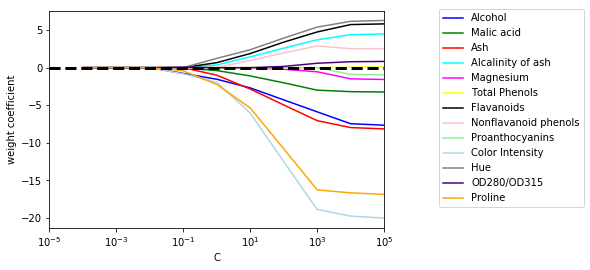

In [31]:
# plot regularization strength vs weight coefficients
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4.0, 6.0):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=wine.columns[column+1],color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

## sequential backward selection, greedy

In [32]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score


In [35]:
class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, # k_features is the desired num of features
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features=k_features
        self.test_size=test_size
        self.random_state=random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=self.test_size, 
                                                            random_state=self.random_state)
        dim = X_train.shape[1] # number of columns in X_train, .shape[0] is the number of rows
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_] #[()]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features: # while the remained features are still more than desired k
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1): #each p is a tuple that removed one feature
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores) # np.argmax(lst) gives you the index of the largest value in the list
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -=1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self,X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test,y_pred)
        return score

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

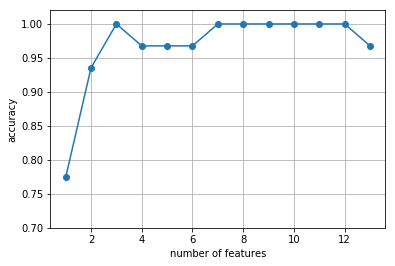

In [37]:
# show the best performance at each stage
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.7, 1.02])
plt.ylabel('accuracy')
plt.xlabel('number of features')
plt.grid()
plt.show()

In [38]:
k3 = list(sbs.subsets_[10])
print(wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315'], dtype='object')


In [39]:
knn.fit(X_train_std, y_train)
print('training accuracy: ', knn.score(X_train_std, y_train))
print('test accuracy:', knn.score(X_test_std, y_test))

training accuracy:  0.967741935483871
test accuracy: 0.9814814814814815


In [41]:
knn.fit(X_train_std[:, k3], y_train)
print('test accuracy:', knn.score(X_test_std[:, k3], y_test))
print('training accuracy:', knn.score(X_train_std[:, k3], y_train))

test accuracy: 0.9259259259259259
training accuracy: 0.9516129032258065


### assessing feature importance with random forests

In [42]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
importances

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

In [43]:
indices = np.argsort(importances)[::-1]
indices

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2])

In [44]:
np.argsort(importances)

array([ 2,  7,  3,  8,  1,  4,  5, 10,  0, 11,  9,  6, 12])

In [50]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color Intensity                0.143920
 4) OD280/OD315                    0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total Phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


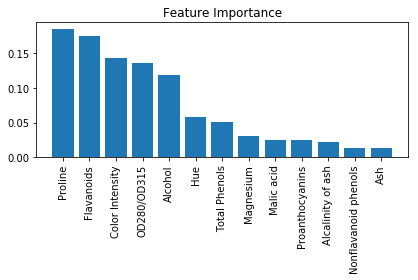

In [55]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### use the SelectFromModel object that selects features based on a user-specified threshold after model fitting.

In [56]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Num of features that meet this threshold criterion:', X_selected.shape[1])

Num of features that meet this threshold criterion: 5


In [57]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]],
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color Intensity                0.143920
 4) OD280/OD315                    0.136162
 5) Alcohol                        0.118529
